<a href="https://colab.research.google.com/github/Anastasiya9323/DES/blob/main/task2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

w = torch.tensor(
    [[5., 10.],
     [1., 2.]], requires_grad=True)

#######
device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
w = w.to(device)
#######

optimizer =  torch.optim.SGD([w],lr=0.001)
for _ in range(500):
    function = torch.log(torch.log(w+7)).prod()
    function.backward()
    optimizer.step()
    w.grad.zero_()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


In [77]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [80]:
import torch

w = torch.tensor(
    [[5., 10.],
     [1., 2.]], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([w], lr=0.001)

def function_parabola(variable):
    return (torch.prod(torch.log(torch.log(torch.as_tensor(variable + 7)))))

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    
for i in range(500000):
    var_history.append(w.data.numpy().copy())
    fn_history.append(function_parabola(w).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, w)

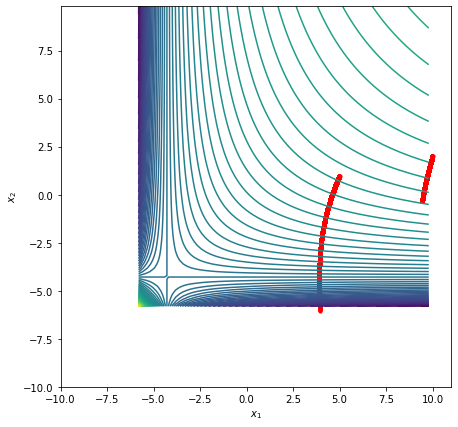

In [81]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');